# Intro

Linear Regression is a linear appraoch to modeling the relationship between a scalar response and one or more explanatory variables. I will be computing a simple linear regression thorugh gradient descent. This is an exploration into the coding of a simple linear regression which has application to very simple data analysis while also helping me visualize and have a concrete although simple model of stochastic gradient descent (SGD).

Regression Equation 

y = mx + b

intercept b, gradient m 


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
from pandas_datareader import data 
import config
pd.options.display.float_format = '{:.2f}'.format

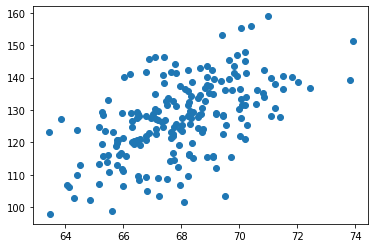

In [32]:
df = pd.read_csv('csv/height_weight.csv')

x = df.height
y = df.weight

xVals = x.tolist()
yVals = y.tolist()

plt.scatter(x,y)

## Mean squared error (MSE)

MSE measures average squared difference between the estiamted values and the actual value. 

Our most accurate linear representation will come from minimizing MSE.

MSE = 1/n sigma(n, i=1) (y_i - y) ** 2 

- y_i is real value associated with a x_i value
- y is our approximated value calculated from x_i
- n = size of data set
- sigma(n, i=1), summation term to go through whole data set
- 1/n to get average of the sum 

Want to find paramters(weights and bias) m and b such that I minimize the error between the points of a graph and the line drawn by y = mx_i + b. This regression problem the most common error function/cost function/ loss function is MSE. 

y = mx_i + b

m = current gradient "guess"
b = current intercept "guess"


### Gradient Descent (GD)

Want to find values of `m` and `b` such that `mse_loss` is minimized.

Gradient descent is an algorithm that minimizes functions. Starting from an initial set of parameter values, iteratively move towards a set of paramter values that minimize the given function. This is achieved by taking steps in the negative direction of the function gradient.


In [96]:
def singleMSE(y_hat, y): 
    return (y_hat-y)**2

def mse(y_hat,y):
    ans = 0 
    for j,k in zip(y_hat,y):
        ans += (j - k)**2
    return ans

# x: list of x poitns
# y: list of y points
# b: current b value
# m: current m value

def get_gradient_at_b(x, y, b, m):
    
    if len(x) != len(y):
        print("list x and y must have same number of values")
        return None
    
    N = len(x)
    diff = 0
    for i in range(N):
        x_val = x[i]
        y_val = y[i]
        diff += (y_val - ((m * x_val) + b))
        b_gradient = -(2/N) * diff  
    return b_gradient

# x: list of x poitns
# y: list of y points
# b: current b value
# m: current m value

def get_gradient_at_m(x, y, b, m):
    
    if len(x) != len(y):
        print("list x and y must have same number of values")
        return None
    
    N = len(x)
    diff = 0
    for i in range(N):
        x_val = x[i]
        y_val = y[i]
        diff += x_val * (y_val - ((m * x_val) + b))
    m_gradient = -(2/N) * diff  
    return m_gradient


def step_gradient(b_current, m_current, x, y, learning_rate):
    b_gradient = get_gradient_at_b(x, y, b_current, m_current)
    m_gradient = get_gradient_at_m(x, y, b_current, m_current)
    b = b_current - (learning_rate * b_gradient)
    m = m_current - (learning_rate * m_gradient)
    return [m, b]


def gradient_descent(x, y, learning_rate = 0.0001, num_iterations = 20, b= 100 , m = -1000):
    b = b
    m = m
    y_checkPoints = []
    for i in range(num_iterations):
        if i % (num_iterations/10) == 0:
            y_checkPoints.append([m*j + b for j in x])
            print('iteration {}: MSE = {:.2f}'.format(i,mse(yVals, y_checkPoints[-1])))
        m, b = step_gradient(b, m, x, y, learning_rate)

    return [m, b], y_checkPoints

iteration 0: MSE = 924929511271.76
iteration 2: MSE = 30266041.67
iteration 4: MSE = 28530.08
iteration 6: MSE = 27541.53
iteration 8: MSE = 27541.49
iteration 10: MSE = 27541.49
iteration 12: MSE = 27541.48
iteration 14: MSE = 27541.48
iteration 16: MSE = 27541.47
iteration 18: MSE = 27541.47


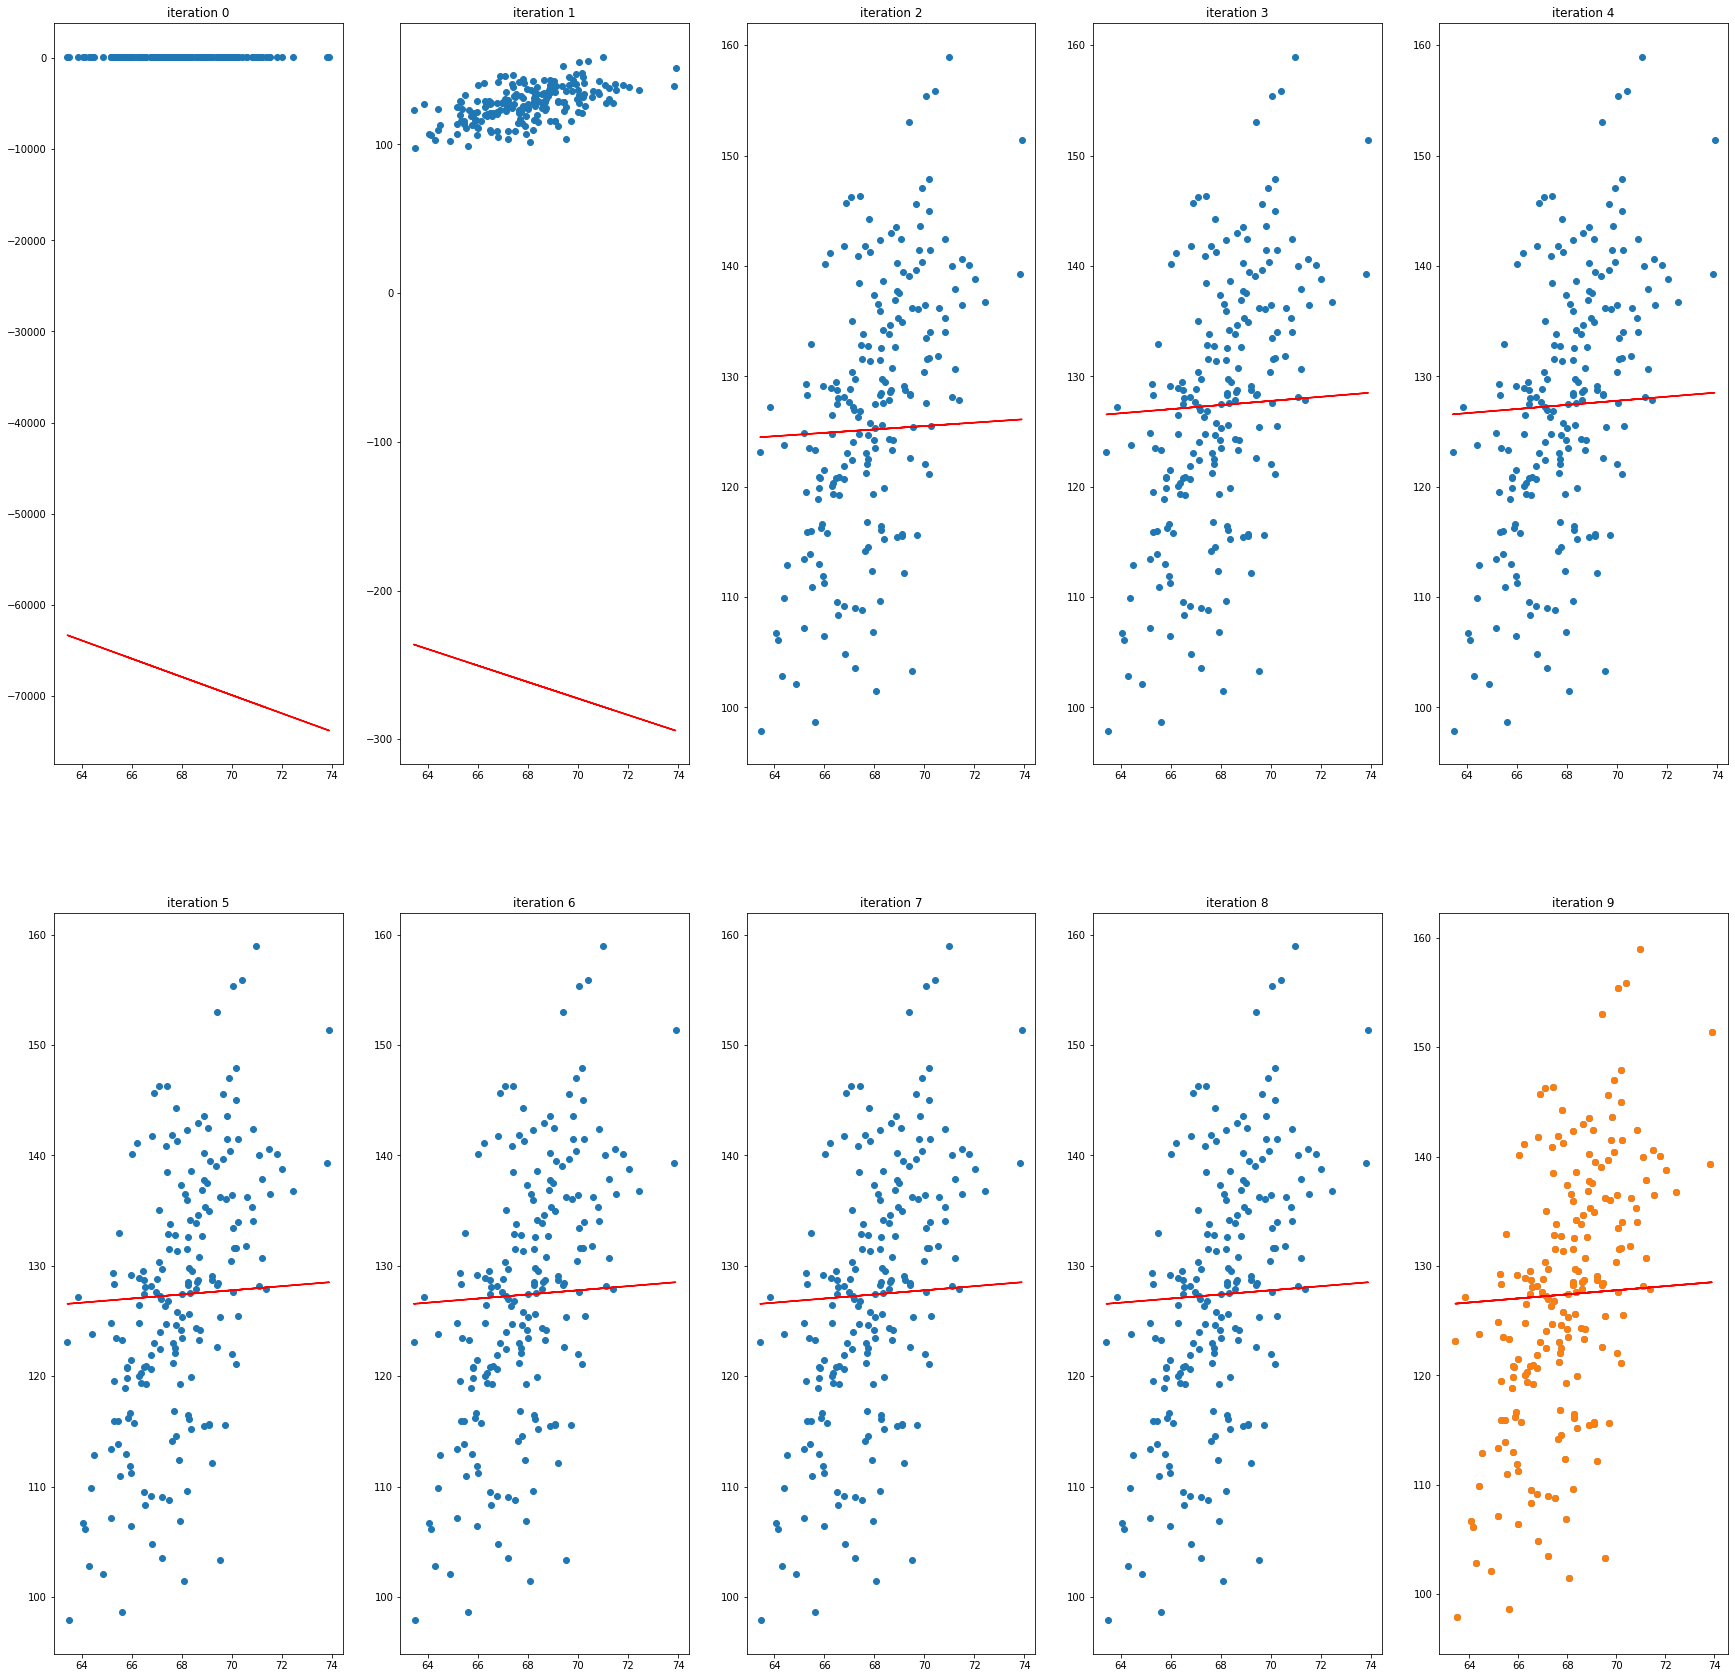

In [97]:
params,y_checkPoints = gradient_descent(xVals,yVals)

m = params[0]
b = params[1]

plt.figure(figsize = (30,30))
for i,ys in enumerate(y_checkPoints):
    ax = plt.subplot(2,5,i+1)
    plt.scatter(x,y)
    plt.plot(xVals, ys, color = 'red')
    plt.title('iteration {}'.format(i))




y_predict = [m*x + b for x in xVals]

plt.scatter(x,y)
plt.plot(x,y_predict, color = 'red')

# Observation 

Much like SGD described in Michael Nielsen's book Neural Networs and Deep Learning, the setting of hyper parameters such as `learning rate` and `num_iterations` can greatly affect the accuracy of the final result prediction. 

Learning rate must be low enough so that each "step" in gradient_descent can safely gaurentee that we will not shoot past our minimum. However on the other side of the coin, the learning rate needs to be high enough so that learning can occur at an acceptable rate. 

For `num_iterations` the significance can be seen when the initial paramters for b and m are extremely wrong, still it is quite easy for the algorithm to find it's minimum. This choice of `num_iterations` will become much more interesting in regards to Deep Learning and training Neural Networks.

The balance of choosing hyper paramters is made extremely simple in this linear regression problem, problems which will grow exponentially and increase in dimensions (batch-size, overfitting, training epochs, etc.). 
However this is still a good precursor to understanding the algorithm of Gradient Descent, and how this algorithm can be implemented for cost functions with more paramters (a lot more) when dealing with Neural Networks.
